### Adding Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.utils import QuantumInstance
#from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
import qiskit

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging

### Working on ad_hoc_data set and ploting its data points

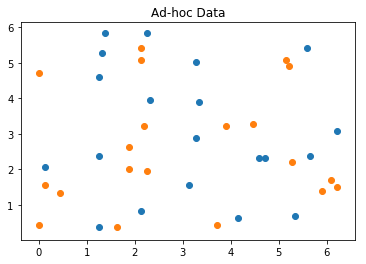

{'A': 0, 'B': 1}


In [3]:
feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

### Set variables for QSVM

In [4]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input, test_input, datapoints[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

print("Length of feature_map: ",len(feature_map))
print("Length of training_input: ",len(training_input))
print("Length of test_input: ",len(test_input))

Length of feature_map:  1
Length of training_input:  2
Length of test_input:  2


### Run QSVM

In [5]:
result = qsvm.run(quantum_instance)

TranspilerError: 'Specified method: default not found in plugin list'